## final-project coconut oil price movement
### Recap
Recall from the robot localization that the state at each time step i is a random variable and the state of time step i is dependent of time step i-1. In this project, each market from different days are i.i.d variables, but different markets on the same day are possibly dependent. In reality one market are dependent of the market from the previous day and the other markets on the same day. But that will create circle in the graphical model.

In the pic below, the circles represent the market price movements. Dotted lines connect the same markets from two consecutive days. Solid lines connect the different markets on the same day.

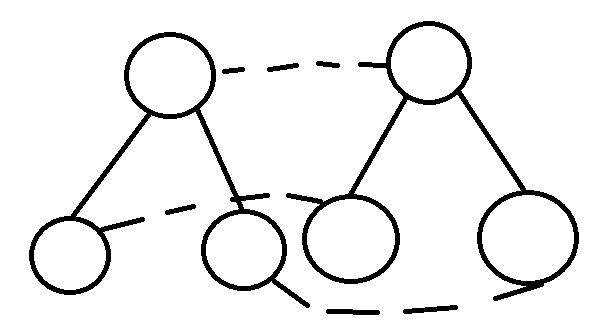

In [4]:
from IPython.display import Image
Image("pgm_two_days_markets.png")

As we were informed before one of the fundamental problems **PGM** is good for is **the marginal**, i.e. what's the probability distribution of a particular random variable? For oil market it's like asking what is the probability distribution of a market price movement on any given day. Up, down, still. Conditioning on some random variable is like saying given that some price movements of some markets are known, what's the probability distributions of the unknown markets.

One way to look at conditioning is take out the node you are conditioning on, reshape the graphical model, rewrite the joint probability equation as you can see in the week5 exercise: **Incorporating Observations in Graphical Models**. But it's also ok to use the original graphical model and the original equation with the node potential of the variable being conditioned on changed to be 100% for the conditioning value, 0 for the rest. The resulting joint probability w.r.t numerical values is the same as the altered equation will produce. With this we can incorporate incomplete observations to the graphical model easily. This is the key observation for **part d**

### analysis of part c
Given that we already have the tree structure, the node potential table and the edge potential table, how do we go about to compute the arbitrary marginal?

First, since the graph is a tree we can pick an arbitrary node to be the root.

Second, we should compute messages from leaves towards the root. Because to compute a message from node i to a higher level node j, we need to know the message from lower nodes adjacent to node i. We can do a bfs search from the root, group the nodes by the distance between them to the root. Compute the forward messages.

Third, compute the messages from root to leaves.

Finally, with all messages in hand we can compute the marginal or joint probability in any order we want.